In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os
folder_path = '/content/drive/My Drive/archive.zip'


In [4]:
os.listdir('/content/drive')


['.file-revisions-by-id',
 'MyDrive',
 '.shortcut-targets-by-id',
 '.Trash-0',
 '.Encrypted']

In [ ]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [ ]:
import zipfile
import os

folder_path = '/content/drive/My Drive/archive.zip'

# Extract 'images' folder from archive.zip
with zipfile.ZipFile(folder_path, 'r') as zip_ref:
  zip_ref.extractall('/content/extracted_images')

# Path to the folder containing the images
image_folder_path = '/content/extracted_images/images'  # Update path if 'images' is in a subfolder

# Get the full path for each image file
filenames = [os.path.join(image_folder_path, file) for file in os.listdir(image_folder_path) if os.path.isfile(os.path.join(image_folder_path, file))]

# Print the full image paths
print(filenames)


['/content/extracted_images/images/21217.jpg', '/content/extracted_images/images/15299.jpg', '/content/extracted_images/images/13643.jpg', '/content/extracted_images/images/25454.jpg', '/content/extracted_images/images/13894.jpg', '/content/extracted_images/images/13541.jpg', '/content/extracted_images/images/25597.jpg', '/content/extracted_images/images/58439.jpg', '/content/extracted_images/images/10712.jpg', '/content/extracted_images/images/12540.jpg', '/content/extracted_images/images/9166.jpg', '/content/extracted_images/images/4452.jpg', '/content/extracted_images/images/35891.jpg', '/content/extracted_images/images/59637.jpg', '/content/extracted_images/images/57719.jpg', '/content/extracted_images/images/5785.jpg', '/content/extracted_images/images/57200.jpg', '/content/extracted_images/images/3795.jpg', '/content/extracted_images/images/48160.jpg', '/content/extracted_images/images/7323.jpg', '/content/extracted_images/images/21015.jpg', '/content/extracted_images/images/2309

In [ ]:
len(filenames)

44441

In [ ]:
#Importing ResNet50 Model and Configuration

In [ ]:
model=ResNet50(weights='imagenet',include_top=False, input_shape=(224,224,3))
model.trainable=False
# Create the sequential model with an input layer
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),  # Define input shape here
    model,
    GlobalMaxPool2D()
])
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
#Extracting features from Image

In [ ]:
# Path to the image
img_path = '/content/extracted_images/images/2339.jpg'

# Verify if the file exists
if os.path.exists(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result / norm(result)
    print(norm_result)
else:
    print(f"File {img_path} does not exist. Please check the path and try again.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[0.         0.04849375 0.00331911 ... 0.00208577 0.02584852 0.00918313]


In [ ]:
result

array([ 0.       , 15.560144 ,  1.0650008, ...,  0.669258 ,  8.293989 ,
        2.9465806], dtype=float32)

In [ ]:
def extract_features_from_images(image_path, model):
  img=image.load_img(image_path, target_size=(224,224))
  img_array=image.img_to_array(img)
  img_expand_dim=np.expand_dims(img_array,axis=0)
  img_preprocess=preprocess_input(img_expand_dim)
  result=model.predict(img_preprocess).flatten()
  norm_result=result/norm(result)
  return norm_result

In [ ]:
extract_features_from_images(filenames[0],model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


array([0.00245349, 0.        , 0.00766043, ..., 0.0126623 , 0.00483108,
       0.01123387], dtype=float32)

In [ ]:
image_features=[]
for file in filenames[0:5]:
  image_features.append(extract_features_from_images(file,model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


[array([0.0073779 , 0.11007208, 0.02403665, ..., 0.0015086 , 0.0216524 ,
        0.07189973], dtype=float32),
 array([0.02724368, 0.04325793, 0.00389621, ..., 0.00322781, 0.02406374,
        0.        ], dtype=float32),
 array([0.        , 0.00539115, 0.00776499, ..., 0.01168635, 0.03666757,
        0.03524069], dtype=float32),
 array([0.01296173, 0.02089632, 0.00409002, ..., 0.        , 0.00904721,
        0.0397599 ], dtype=float32),
 array([0.00298609, 0.06110765, 0.0237071 , ..., 0.01693863, 0.01901553,
        0.02063978], dtype=float32)]

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import os

# Adjusted function to extract features from a batch in parallel
def process_batch(batch_files, model):
    batch_features = [extract_features_from_images(file, model) for file in batch_files]
    return np.array(batch_features)

# Define the batch size and number of workers
batch_size = 5
num_workers = 4  # Adjust based on available CPU/GPU cores in Colab

# Main extraction loop with parallel processing
for start in range(0, len(filenames), batch_size):
    end = min(start + batch_size, len(filenames))
    batch_files = filenames[start:end]

    # Parallel feature extraction
    with ThreadPoolExecutor(max_workers=num_workers) as executor:
        batch_features = list(executor.map(lambda file: extract_features_from_images(file, model), batch_files))

    # Convert to numpy array and save batch
    batch_features = np.array(batch_features)
    batch_index = start // batch_size
    np.save(f'/content/drive/MyDrive/feature_batches/batch_{batch_index}.npy', batch_features)
    print(f"Processed batch {batch_index} ({start} to {end})")

print("Feature extraction completed.")



Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 919ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
Processed batch 8055 (40275 to 40280)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 917ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
Processed batch 8056 (40280 to 40285)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
Processed batch 8057 (40285 to 40290)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
Processed batch 8058 (40290 to 40295)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import numpy as np

# Define paths and parameters
output_dir = '/content/drive/MyDrive/feature_batches'  # Path where batches are saved
total_images = len(filenames)  # Total number of images processed
batch_size = 500  # Batch size used during extraction
expected_batches = (total_images + batch_size - 1) // batch_size  # Calculate expected number of batches

# List saved batch files in the output directory
saved_batches = sorted([file for file in os.listdir(output_dir) if file.endswith('.npy')])

# Check if the number of saved files matches the expected number of batches
if len(saved_batches) == expected_batches:
    print(f"All batches saved successfully! ({len(saved_batches)}/{expected_batches} batches found)")
else:
    print(f"Warning: Some batches are missing! ({len(saved_batches)}/{expected_batches} batches found)")

# Optionally, verify contents by loading and checking a few batch files
for i in range(min(3, len(saved_batches))):  # Load first 3 batches to check content
    batch_path = os.path.join(output_dir, saved_batches[i])
    batch_data = np.load(batch_path)
    print(f"Batch {i} shape: {batch_data.shape}")


In [ ]:
# prompt: how to make all the saved batches in google drive into a single folder

import os
import shutil

# Define the source directory where your batches are stored
source_dir = '/content/drive/MyDrive/feature_batches'

# Define the destination directory where you want to create the single folder
destination_dir = '/content/drive/MyDrive/all_feature_batches'

# Create the destination directory if it doesn't exist
os.makedirs(destination_dir, exist_ok=True)

# Move all files from the source directory to the destination directory
for filename in os.listdir(source_dir):
    source_file = os.path.join(source_dir, filename)
    destination_file = os.path.join(destination_dir, filename)
    shutil.move(source_file, destination_file)

print(f"All files moved from '{source_dir}' to '{destination_dir}'.")

# Optionally, you can delete the original source directory if needed
# shutil.rmtree(source_dir)

All files moved from '/content/drive/MyDrive/feature_batches' to '/content/drive/MyDrive/all_feature_batches'.


In [ ]:
# prompt: how to display the size of all_feature_batches

# Get the list of files in the all_feature_batches directory
all_feature_batches_files = os.listdir('/content/drive/MyDrive/all_feature_batches')

# Initialize the total size
total_size = 0

# Iterate through the files and calculate the size of each one
for file in all_feature_batches_files:
    file_path = os.path.join('/content/drive/MyDrive/all_feature_batches', file)
    file_size = os.path.getsize(file_path)
    total_size += file_size

# Print the total size in MB
print(f"Total size of all_feature_batches: {total_size / (1024 * 1024):.2f} MB")

Total size of all_feature_batches: 348.28 MB


In [ ]:
# prompt: how to display the number of extracted features in that folder

# Define the directory where the feature batches are stored
feature_batches_dir = '/content/drive/MyDrive/all_feature_batches'

# Get a list of all the .npy files (feature batches) in the directory
feature_batch_files = [f for f in os.listdir(feature_batches_dir) if f.endswith('.npy')]

# Initialize a counter for the total number of extracted features
total_extracted_features = 0

# Iterate through each feature batch file
for file in feature_batch_files:
  # Load the feature batch from the file
  file_path = os.path.join(feature_batches_dir, file)
  batch_data = np.load(file_path)

  # Get the number of features in the current batch
  num_features_in_batch = batch_data.shape[0]

  # Add the number of features in this batch to the total count
  total_extracted_features += num_features_in_batch

# Print the total number of extracted features
print(f"Total number of extracted features: {total_extracted_features}")

Total number of extracted features: 44441


In [ ]:
#Finding similar images with nearest neighbours

In [ ]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [ ]:
import numpy as np
import os

# Define the path to the directory containing all feature batches
batches_dir = '/content/drive/MyDrive/all_feature_batches'

# Initialize an empty list to store features from each batch
all_image_features = []

# Load each batch file and append the features to all_image_features
for batch_file in sorted(os.listdir(batches_dir)):
    if batch_file.endswith('.npy'):  # Check that the file is a .npy file
        batch_path = os.path.join(batches_dir, batch_file)
        batch_data = np.load(batch_path)
        all_image_features.append(batch_data)

# Concatenate all batch features into a single numpy array
image_features = np.vstack(all_image_features)

# Check the shape to ensure it’s loaded correctly
print("Combined image_features shape:", image_features.shape)



Combined image_features shape: (44441, 2048)


In [ ]:
import numpy as np
import os

# Define the path to the directory containing all feature batches
batches_dir = '/content/drive/MyDrive/all_feature_batches'

# Initialize an empty list to store features from each batch
all_image_features = []

# Load each batch file and append the features to all_image_features
for batch_file in sorted(os.listdir(batches_dir)):
    batch_path = os.path.join(batches_dir, batch_file)
    batch_data = np.load(batch_path)
    all_image_features.append(batch_data)

# Concatenate all batch features into a single numpy array
image_features = np.vstack(all_image_features)

# Check if image_features is loaded correctly
if image_features is None or len(image_features) == 0:
    print("Error: image_features is empty. Please ensure that features have been correctly loaded.")
else:
    print("image_features loaded successfully. Shape:", image_features.shape)

# Initialize and fit the NearestNeighbors model
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(image_features)


image_features loaded successfully. Shape: (44441, 2048)


NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalMaxPooling2D
import tensorflow as tf

# Recreate the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])
model.trainable = False  # Freeze the model weights


In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
from numpy.linalg import norm

def extract_features_from_images(image_path, model):
    """
    Extracts features from a given image using a pre-trained model.

    Args:
        image_path (str): The path to the image file.
        model (tensorflow.keras.Model): The pre-trained model.

    Returns:
        numpy.ndarray: The extracted features as a flattened array.
    """
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Error: File {image_path} does not exist.")

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)

    # Extract features using the model's predict function
    result = model.predict(img_preprocess).flatten()

    # Normalize the result
    norm_result = result / norm(result)
    return norm_result

# Path to the image file
image_path = '/content/extracted_images/images/2339.jpg'  # Update the path as needed

# Call the function
try:
    input_image = extract_features_from_images(image_path, model)
    print("Extracted features for input image:", input_image)
except FileNotFoundError as e:
    print(e)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Extracted features for input image: [0.         0.04849375 0.00331911 ... 0.00208577 0.02584852 0.00918313]


In [ ]:
distance,indices=neighbors.kneighbors([input_image])

In [ ]:
indices[0]

array([ 9975,  9681, 34669, 25435, 29116, 30981])

In [ ]:
from IPython.display import Image

In [ ]:
# Check the raw features before normalization
raw_result = result
norm_result = raw_result / norm(raw_result)
print("Raw features:", raw_result)
print("Normalized features:", norm_result)


Raw features: [ 0.        15.560144   1.0650008 ...  0.669258   8.293989   2.9465806]
Normalized features: [0.         0.04849375 0.00331911 ... 0.00208577 0.02584852 0.00918313]


In [ ]:
from sklearn.neighbors import NearestNeighbors

# Initialize NearestNeighbors with cosine metric
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='cosine')

# Fit the model
neighbors.fit(image_features)

# Find the nearest neighbors for the input image
distance, indices = neighbors.kneighbors([input_image])


In [ ]:
print(f"Feature vector shape before normalization: {result.shape}")
print(f"Feature vector shape after normalization: {norm_result.shape}")


Feature vector shape before normalization: (2048,)
Feature vector shape after normalization: (2048,)


In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Define the image path
image_path = '/content/extracted_images/images/2339.jpg'

# Check if the file exists
if not os.path.exists(image_path):
    print(f"Error: File {image_path} not found.")
else:
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    print("Image preprocessing completed.")




Image preprocessing completed.


In [ ]:
print("Shape of all image features:", image_features.shape)


Shape of all image features: (44441, 2048)


In [ ]:
import os
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Verify file existence
test_image_path = '/content/2339.jpg'
if not os.path.exists(test_image_path):
    print(f"Error: File {test_image_path} not found. Using a default image.")
    test_image_path = subset_filenames[0]  # Use the first image in the subset

# Test similarity for one image
try:
    input_image = extract_features_from_images(test_image_path, model)
    distance, indices = neighbors.kneighbors([input_image])
    print("Recommended indices:", indices)
except Exception as e:
    print(f"An error occurred: {e}")



Error: File /content/2339.jpg not found. Using a default image.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
Recommended indices: [[0 1 2 3 5 9]]


In [ ]:
distance,indices=neighbors.kneighbors([input_image])

In [ ]:
indices[0]

array([0, 1, 2, 3, 5, 9])

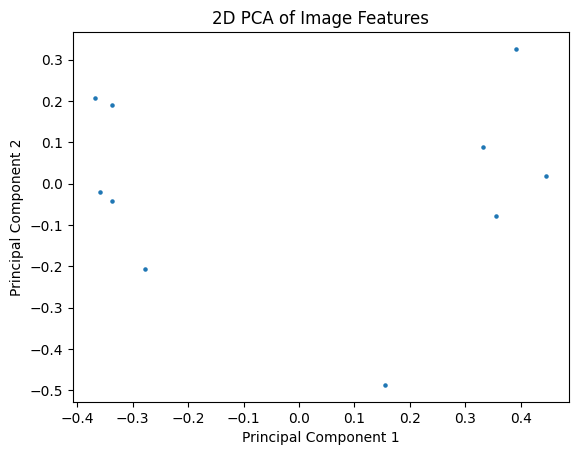

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce feature dimensions to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(image_features)

# Plot the features in 2D space
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], s=5)
plt.title("2D PCA of Image Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Fine-tune the last few layers
for layer in base_model.layers[:-10]:  # Freeze all but the last 10 layers
    layer.trainable = False

# Recreate the full model
model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Try Manhattan Distance instead of Euclidean
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='manhattan')


In [ ]:
print("Shape of features in batch:", batch_data.shape)


Shape of features in batch: (5, 2048)


In [ ]:
print("Distances to nearest neighbors:", distance)


Distances to nearest neighbors: [[0.         0.31034458 0.33582658 0.33871913 0.3704571  0.47082114]]


In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

def extract_features_from_images(image_path, model):
    """
    Extracts features from a given image using a pre-trained model.

    Args:
        image_path (str): The path to the image file.
        model (tensorflow.keras.Model): The pre-trained model.

    Returns:
        numpy.ndarray: The extracted features as a flattened array.
    """
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Error: File {image_path} does not exist.")

    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result / np.linalg.norm(result)
    return norm_result

# Debug and fallback logic
image_path = '2339.jpg'

# Define a small subset for debugging
subset_filenames = filenames[:10]  # Ensure this list is populated correctly

# Choose the default image if the specified path doesn't exist
if not os.path.exists(image_path):
    print(f"Warning: {image_path} not found. Using default image from subset: {subset_filenames[0]}")
    image_path = subset_filenames[0]  # Default to the first image in the subset

# Extract features from the chosen image
input_image = extract_features_from_images(image_path, model)

# Display the extracted features or use them for further processing
print("Extracted features for the input image:", input_image)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Extracted features for the input image: [0.00245349 0.         0.00766043 ... 0.0126623  0.00483108 0.01123387]


In [ ]:

from sklearn.neighbors import NearestNeighbors
import os

# Ensure subset_filenames is correctly defined and populated
subset_filenames = filenames[:10]  # Use only the first 10 images for debugging

# Fit the Nearest Neighbors model to the batch data
batch_data = [extract_features_from_images(file, model) for file in subset_filenames]
batch_data = np.array(batch_data)

neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='cosine')
neighbors.fit(batch_data)

# Check if the specified image exists, otherwise use the first image from the subset
image_path = '2339.jpg'
if not os.path.exists(image_path):
    print(f"Warning: {image_path} not found. Using default image from subset: {subset_filenames[0]}")
    image_path = subset_filenames[0]

# Extract features and find neighbors for the selected image
input_image = extract_features_from_images(image_path, model)
distance, indices = neighbors.kneighbors([input_image])

# Display the results
print("Recommended indices:", indices)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Recommended indices: [[0 1 2 3 5 9]]


In [ ]:
indices[0]

array([0, 1, 2, 3, 5, 9])

In [ ]:
from IPython.display import Image

In [ ]:
import zipfile
import os

# Path to the zip file and extract location
zip_path = '/content/drive/MyDrive/archive.zip'  # Update with your actual zip file path
extract_path = '/content/extracted_images'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete. Files are in:", os.listdir(extract_path))



Extraction complete. Files are in: ['images', 'myntradataset', 'styles.csv']


In [ ]:
image_name = '21217.jpg'
found_path = None

for root, dirs, files in os.walk(extract_path):
    if image_name in files:
        found_path = os.path.join(root, image_name)
        break

if found_path:
    print("Image found at:", found_path)
else:
    print("Image not found!")


Image found at: /content/extracted_images/images/21217.jpg


In [ ]:
import os

# List all files and directories in the extracted folder
for root, dirs, files in os.walk(extract_path):
    print(f"Directory: {root}")
    for file in files:
        print(f"File: {file}")



Streaming output truncated to the last 5000 lines.
File: 15096.jpg
File: 31074.jpg
File: 33167.jpg
File: 23133.jpg
File: 11248.jpg
File: 46483.jpg
File: 18194.jpg
File: 5494.jpg
File: 2040.jpg
File: 5418.jpg
File: 38574.jpg
File: 19796.jpg
File: 48859.jpg
File: 13049.jpg
File: 38722.jpg
File: 7709.jpg
File: 10238.jpg
File: 18305.jpg
File: 14605.jpg
File: 25571.jpg
File: 58097.jpg
File: 29524.jpg
File: 26536.jpg
File: 11126.jpg
File: 15477.jpg
File: 17751.jpg
File: 11331.jpg
File: 10198.jpg
File: 35451.jpg
File: 51058.jpg
File: 40592.jpg
File: 8622.jpg
File: 53851.jpg
File: 19960.jpg
File: 21879.jpg
File: 1784.jpg
File: 26305.jpg
File: 26055.jpg
File: 43186.jpg
File: 52411.jpg
File: 15147.jpg
File: 17172.jpg
File: 55472.jpg
File: 26376.jpg
File: 58921.jpg
File: 15271.jpg
File: 34221.jpg
File: 6571.jpg
File: 20421.jpg
File: 22603.jpg
File: 12267.jpg
File: 58257.jpg
File: 2010.jpg
File: 57428.jpg
File: 25572.jpg
File: 48870.jpg
File: 16039.jpg
File: 31920.jpg
File: 27975.jpg
File: 58395.j

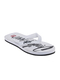

In [ ]:
from IPython.display import Image, display

# Display the image
image_path = "/content/extracted_images/images/21217.jpg"  # Enclose the path in quotes
display(Image(filename=image_path))



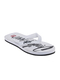

In [ ]:
Image(filenames[indices[0][0]])

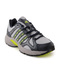

In [ ]:
Image(filenames[indices[0][1]])


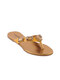

In [ ]:
Image(filenames[indices[0][2]])

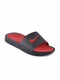

In [ ]:
Image(filenames[indices[0][3]])

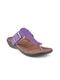

In [ ]:
Image(filenames[indices[0][4]])